In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# mnist = fetch_openml('mnist_784') # loads as pandas DF.
mnist = fetch_openml('mnist_784' , as_frame=False) # To load as a numpy array.

In [3]:
# mnist # to fetch info about this dataset - mnist_784

In [4]:
x,y = mnist['data'],mnist['target'] #assigning variables to features and labels

In [5]:
x # x is two dimensional numpy array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y # y is one dimensional numpy array

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
# x[0] # zeroth index of x

In [8]:
x[0].shape # (784,) of zeroth index corresponds to the column of x shape which is 784 (70000, 784) 

(784,)

In [9]:
x.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
%matplotlib inline

In [12]:
import matplotlib
import matplotlib.pyplot as plt

In [13]:
num= 36001

In [14]:
x[num].shape 

(784,)

x[36001] is a 1d array where all the pixels are arranged in a linear form. To be able to display in matrix form we need to reshape in the form rows x columns.

In [15]:
28*28

784

In [16]:
some_digit= x[num]

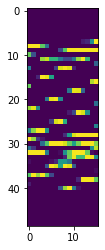

In [17]:
plt.imshow(some_digit.reshape(49,16)) # see how the image shows if its not distributed in the desired form of row x col

In [18]:
some_digit_image = some_digit.reshape(28,28)

In [19]:
# some_digit_image

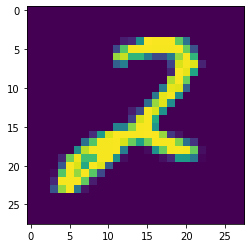

In [20]:
plt.imshow(some_digit_image)

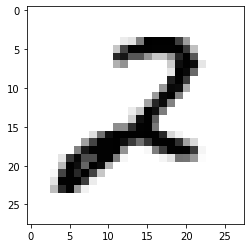

In [21]:
plt.imshow(some_digit_image,cmap= matplotlib.cm.binary)

(-0.5, 27.5, 27.5, -0.5)

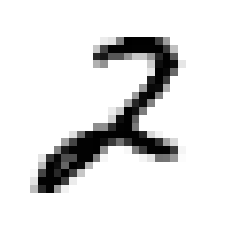

In [22]:
plt.imshow(some_digit_image,cmap= matplotlib.cm.binary,interpolation = "nearest")
plt.axis("off")

__Notice how the rows are stocked vertically starting from top__

In [23]:
y[num]

'2'

In [24]:
train_nums= 60000

__Now splitting Train and Test data__

In [25]:
x_train,x_test= x[:train_nums], x[train_nums:]

In [26]:
x_train.shape

(60000, 784)

In [27]:
x_test.shape

(10000, 784)

In [28]:
y_train,y_test= y[:train_nums], y[train_nums:]

In [29]:
y_train.shape

(60000,)

In [30]:
y_test.shape

(10000,)

__The dataset we have is already splitted to contain all the values. But it is always a good practise to shuffle any new dataset.__
Here Shuffling the training dataset itself. No use !

In [31]:
x_train # for comparing below

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y_train  # for comparing below

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [33]:
# import numpy as np
# shuffle_index= np.random.permutation(train_nums)
# X_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

In [34]:
# shuffle_index.shape

In [35]:
x_train.shape

(60000, 784)

In [36]:
y_train.shape

(60000,)

In [37]:
x_train  # for comparing above. Changes made but cannot be observed.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y_train  # for comparing above. Notice the shuffle made comparing with the y_train above.

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

## Creating a number 2 detector.

Changing the labels only. Features are kept as it is. Also original labels are not changed. New variables assigned.

Observe the dtype of y_test and y_train above(labels only). dtype is object. That means that all the values of y_test,y_train are characters. We need them to convert into integers or else the Logistic regression model will throw an error. Shown below.

In [39]:
import numpy as np
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [41]:
y_test.min()

0

In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

In [43]:
list_train = []
for i in range (0,10):
    y_train_2 = (y_train == i) 
    print (np.count_nonzero(y_train_2))
    count_train = np.count_nonzero(y_train_2)
    list_train.append(count_train)
print (list_train)
print (sum(list_train))

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
60000


In [44]:
5923/60000 # checking distribution of datasets for train and test

0.09871666666666666

In [45]:
980/10000 # checking distribution of datasets for train and test

0.098

In [46]:
6742/60000 # observe how train and test data is splitted in equal ratio for that particular number [0 to 9 ]

0.11236666666666667

In [47]:
1135/10000 # observe how train and test data is splitted in equal ratio for that particular number [0 to 9 ]

0.1135

In [48]:
list_test = []
for i in range (0,10):
    y_test_2 = (y_test == i) 
    print (np.count_nonzero(y_test_2))
    count_test = np.count_nonzero(y_test_2)
    list_test.append(count_test)
print (list_test)
print (sum(list_test))

980
1135
1032
1010
982
892
958
1028
974
1009
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
10000


In [49]:
y_train_2 = (y_train == 2) 
y_test_2 = (y_test == 2) 
# y_train_2 = (y_train!=2)
# y_test_2 = (y_test!=2)
# Assigning variable to the arrays of y_train where it returns true/false for the input number provided.
# Rememember if dtype of labels are not changed to integer, (y_train_2,y_test_2) will always return False value. 

In [50]:
y_train_2.shape

(60000,)

In [51]:
y_test_2.shape

(10000,)

In [52]:
y_train_2

array([False, False, False, ..., False, False, False])

In [53]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [54]:
np.count_nonzero(y_train_2) # Counting the occurance of True in Train array Method 1
#Method 1 to count particular element inside numpy array. This method returns non zero only.

5958

In [55]:
np.count_nonzero(y_train_2==True)  # Counting the occurance of True in Train array Method 2
#Method 2 to count particular element inside numpy array. This method can count any elements occurance inside an array.

5958

In [56]:
np.count_nonzero(y_test_2==True) # Counting the occurance of True in Test array Method 2

1032

In [57]:
np.count_nonzero(y_test==2) # Counting the occurance of 2 before converting to boolean. Same value obtained.

1032

In [58]:
np.count_nonzero(y_train==2)

5958

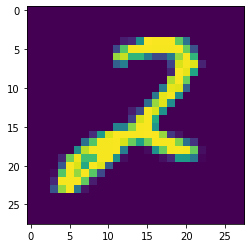

In [59]:
plt.imshow(x_train[36001].reshape(28,28))

## Applying Model and Predicting

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [61]:
# clf = LogisticRegression() # This can be used but will throw convergence warning
# clf = LogisticRegression(tol = 0.1,solver = 'saga') # doesn't throw any error. Faster for big datasets.
clf = LogisticRegression(tol = 0.1,solver = 'liblinear') # doesn't throw any error
# clf = SGDClassifier(tol = 0.1) 
# clf = SGDClassifier(tol = 0.1) 

Takes too much time to fit the model if tol = 0.1 not provided

multiple solvers are available: “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga” - More about them on https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [62]:
clf.fit(x_train , y_train_2)

LogisticRegression(solver='liblinear', tol=0.1)

In [63]:
y_train_2[36001]

True

In [64]:
y_train[36001]

2

In [65]:
clf.predict([some_digit])

array([ True])

In [66]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2, cv= 3, scoring='accuracy')

In [67]:
a

array([0.9759 , 0.9773 , 0.97985])

In [68]:
a.mean()

0.9776833333333332

In [69]:
(1032/5958)*100

17.32124874118832

In [70]:
100-17.32

82.68

In [71]:
np.count_nonzero(y_train==2)

5958

In [72]:
100-((5958/60000)*100)

90.07

Why accuracy metric is not good? https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it
The best way to evaluate our classifier model is by using confusion metrics.

In [73]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,x_train,y_train_2, cv=3)

In [74]:
y_train_pred.shape
# y_train_pred

(60000,)

In [75]:
np.count_nonzero(y_train_pred)

5425

In [76]:
np.count_nonzero(y_train_2)

5958

# Calculating Confusion metrics 
Think about business importance. If we are developing a system that detects fraud in bank transactions, it is desirable that we have a very high recall, ie. most of the fraudulent transactions are identified, probably at loss of precision, since it is very important that all fraud is identified or at least suspicions are raised. In turn if we have a source of data like Twitter and we are interested in finding out when a tweet expresses a negative sentiment about a certain politician, we can probably raise precision (to gain certainty) at the expense of losing recall, since we don't lose much in this case and the source of data is so massive anyway.

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_train_2,y_train_pred)

array([[53639,   403],
       [  936,  5022]], dtype=int64)

In [79]:
confusion_matrix(y_train_2,y_train_2) # This is perfectly trained dataset. Observe the diagonal matrix.

array([[54042,     0],
       [    0,  5958]], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_2, y_train_pred)

0.9776833333333333

In [81]:
(53639+5022)/60000 #Verifying accuracy score using formula Accuracy = (TP +TN)/ (TP+TN+FP+FN)

0.9776833333333333

In [82]:
from sklearn.metrics import recall_score, precision_score

In [83]:
precision_score(y_train_2,y_train_pred) #Precision Score

0.9257142857142857

In [84]:
5022/(5022 +403 ) # Precision = (TP/TP+FP)

0.9257142857142857

In [85]:
recall_score(y_train_2,y_train_pred) #recall score

0.8429003021148036

In [86]:
5022/(5022 + 936)# Recall= (TP /TP+FN)

0.8429003021148036

# F1 Score

In [87]:
from sklearn.metrics import f1_score

In [88]:
f1_score(y_train_2,y_train_pred)

0.8823684441711324

In [89]:
(2*0.9257142857142857 * 0.8429003021148036)/(0.9257142857142857+0.8429003021148036 ) #F1 Score = (2 x Precision x Recall)/ (Precision + Recall)

0.8823684441711324

## Precision Recall Curve 

In [90]:
from sklearn.metrics import precision_recall_curve

In [91]:
y_scores = cross_val_predict(clf,x_train,y_train_2, cv=3,method= 'decision_function')

In [92]:
y_scores

array([ -6.72747318,  -7.17346061,  -3.13561714, ..., -11.6590677 ,
        -5.03462797,  -4.50524051])

In [93]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2,y_scores)

In [94]:
precisions.shape

(59026,)

In [95]:
recalls.shape

(59026,)

In [96]:
thresholds.shape

(59025,)

## Plotting the precision recall curve

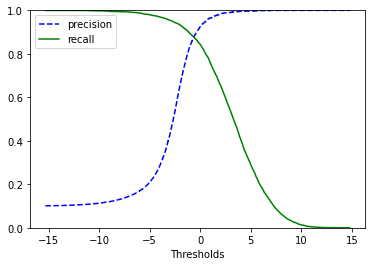

In [97]:
plt.plot (thresholds,precisions[:-1],"b--", label= "precision")
plt.plot (thresholds,recalls[:-1],"g-", label= "recall") 
# slicing done as last precision and recall values were not equal in shape to threshold. Threshold was 1 row more.
# The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold. This ensures that the graph starts on the y axis.
# check link - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()